In [1]:
import sys
sys.path.append("C:\\Users\\tirth\\Desktop\\INTERESTS\\PyMC4")
import tensorflow as tf
import pymc4 as pm
import numpy as np
import arviz as az

In [2]:
class RasmussenMean(pm.gp.mean.Mean):
    def __call__(self, X):
        return 0.25 * (tf.reduce_sum(X, -1) ** 2.)

In [3]:
mean_fn = RasmussenMean(1)
cov_fn = pm.gp.cov.ExpQuad(1., 1., 1)
rasmussen_gp = pm.gp.gp.LatentGP(mean_fn, cov_fn)
X = np.linspace(-5., 5., 50, dtype=np.float32).reshape(-1, 1)
prior = rasmussen_gp.prior('prior', X)
samples = prior.sample(3)
# @pm.model
# def rasmussen_prior_model():
#     prior = yield rasmussen_gp.prior('prior', X)
# samples = pm.sample(rasmussen_prior_model(), num_samples=3, num_chains=1)

In [4]:
# samples.shape
# samples = samples.posterior['rasmussen_prior_model/prior']

In [5]:
samples = np.array(samples)

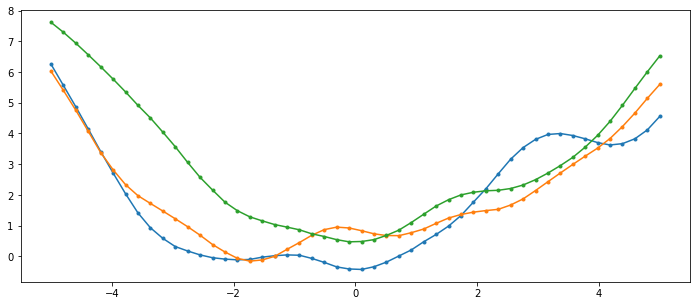

In [6]:
from pymc4.gp.util import plot_gp_dist
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,5))
ax = plt.gca()
ax.plot(X, samples[0], marker='.')
ax.plot(X, samples[1], marker='.')
ax.plot(X, samples[2], marker='.')

In [7]:
# cond = rasmussen_gp.conditional('cond', X, given={"X": X, "f": tf.convert_to_tensor(samples[0])})
@pm.model
def rasmussen_model_cond():
    prior = yield rasmussen_gp.prior('prior', X)
    cond = yield rasmussen_gp.conditional('cond', X, given={"X": X, "f": prior})
# samples = cond.sample(3)
samples = pm.sample(rasmussen_model_cond(), num_samples=3, num_chains=1)

Instructions for updating:
Do not pass `graph_parents`.  They will  no longer be used.


In [8]:
# samples = samples.numpy()
samples = samples.posterior['rasmussen_model_cond/cond']

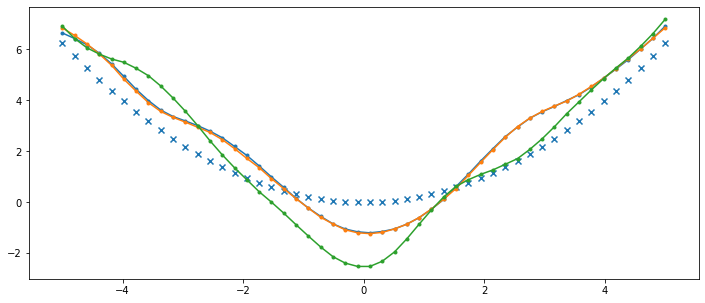

In [10]:
fig = plt.figure(figsize=(12,5))
ax = plt.gca()
ax.plot(X, samples[0][0], marker='.')
ax.plot(X, samples[0][1], marker='.')
ax.plot(X, samples[0][2], marker='.')
ax.scatter(X, mean_fn(X), marker='x')